In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('customer_data.csv')
df.head()

,customer_id,age,income,frequency,spending
0,1,22,35000,5,40
1,2,25,40000,8,60
2,3,28,50000,6,50
3,4,35,65000,12,80
4,5,40,70000,15,90


In [3]:
features = ['age', 'income', 'frequency', 'spending']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

print("Scaled Features:\n", X_scaled[:5])

Scaled Features:
 [[-1.27603573 -1.32133534 -1.21817642 -1.42331427]
 [-0.94602649 -1.04945564 -0.68074565 -0.46806979]
 [-0.61601725 -0.50569624 -1.03903283 -0.94569203]
 [ 0.15400431  0.30994286  0.03582872  0.48717468]
 [ 0.70401971  0.58182256  0.57325949  0.96479692]]


In [4]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

print(df.head())

   customer_id  age  income  frequency  spending  cluster
0            1   22   35000          5        40        1
1            2   25   40000          8        60        1
2            3   28   50000          6        50        2
3            4   35   65000         12        80        0
4            5   40   70000         15        90        4


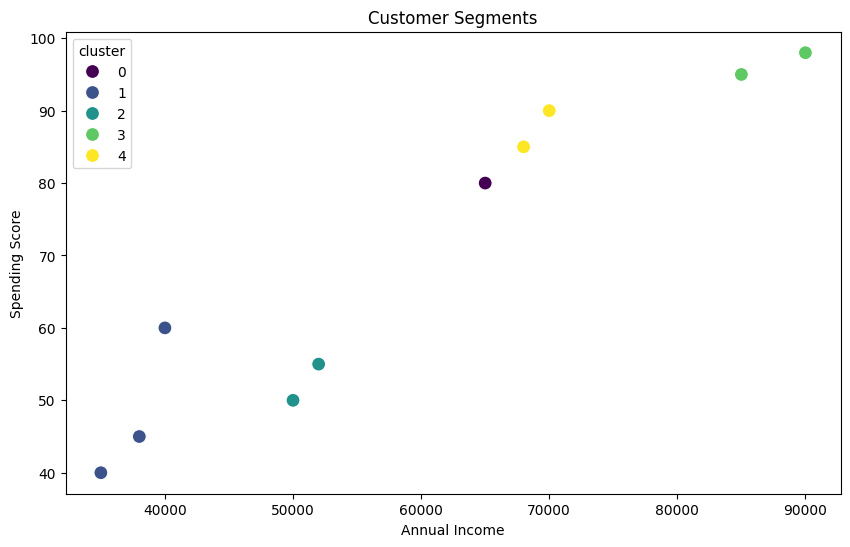

In [5]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['income'], y=df['spending'], hue=df['cluster'], palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

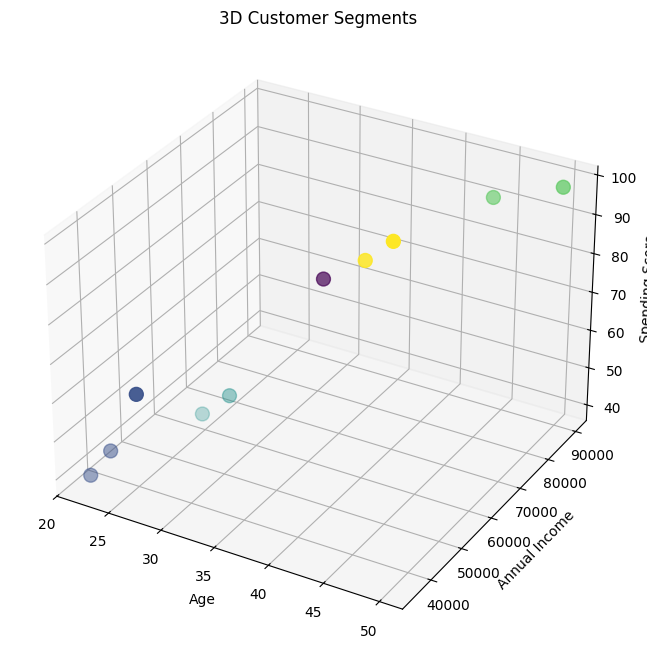

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['age'], df['income'], df['spending'], 
           c=df['cluster'], cmap='viridis', s=100)

ax.set_title('3D Customer Segments')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

plt.show()

In [7]:
df.to_csv('segmented_customers.csv', index=False)